In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = sns.load_dataset("titanic")
# titanic_dataframe = pd.DataFrame(titanic_data)

In [3]:
def calculate_percentage_of_missing_data():
    missing_data = df.isnull().sum()
    missing_data_percentage = missing_data /len(df) *100
    missing_data_percentage = pd.DataFrame({"Column":missing_data_percentage.index,"Percentage of Missing Data":missing_data_percentage.values.round(2) })
    missing_data_percentage["Percentage of Missing Data"] = missing_data_percentage["Percentage of Missing Data"].astype(str) + "%"
    return missing_data_percentage

calculate_percentage_of_missing_data()

,Column,Percentage of Missing Data
0,survived,0.0%
1,pclass,0.0%
2,sex,0.0%
3,age,19.87%
4,sibsp,0.0%
5,parch,0.0%
6,fare,0.0%
7,embarked,0.22%
8,class,0.0%
9,who,0.0%


In [4]:
df = df.dropna(subset=['embarked', 'embark_town'])

calculate_percentage_of_missing_data()

,Column,Percentage of Missing Data
0,survived,0.0%
1,pclass,0.0%
2,sex,0.0%
3,age,19.91%
4,sibsp,0.0%
5,parch,0.0%
6,fare,0.0%
7,embarked,0.0%
8,class,0.0%
9,who,0.0%


In [5]:
column_means = df.mean()

df = df.fillna(column_means)

calculate_percentage_of_missing_data()

C:\Users\demon\AppData\Local\Temp\ipykernel_6328\1216649921.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_means = df.mean()


,Column,Percentage of Missing Data
0,survived,0.0%
1,pclass,0.0%
2,sex,0.0%
3,age,0.0%
4,sibsp,0.0%
5,parch,0.0%
6,fare,0.0%
7,embarked,0.0%
8,class,0.0%
9,who,0.0%


In [6]:
from sklearn.impute import SimpleImputer

categorical_columns = ['deck']
imputer = SimpleImputer(strategy = 'most_frequent')
imputer.fit(df[categorical_columns])
df[categorical_columns] = pd.DataFrame(imputer.transform(df[categorical_columns]), columns = categorical_columns)

#dropping any other rows with missing data
df = df.dropna()

calculate_percentage_of_missing_data()


,Column,Percentage of Missing Data
0,survived,0.0%
1,pclass,0.0%
2,sex,0.0%
3,age,0.0%
4,sibsp,0.0%
5,parch,0.0%
6,fare,0.0%
7,embarked,0.0%
8,class,0.0%
9,who,0.0%


In [7]:
print(df['fare'].var())
# print(df['fare'].head(15))

df['fare'] = np.log(df['fare'])

# print(df['fare'].var())

2474.742317473047


C:\ProgramData\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
df['family_size'] = df['sibsp'] + df['parch']

print(df['sibsp'].head(10))
print(df['parch'].head(10))
print(df['family_size'].head(10))

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    3
8    0
9    1
Name: sibsp, dtype: int64
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    2
9    0
Name: parch, dtype: int64
0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    4
8    2
9    1
Name: family_size, dtype: int64


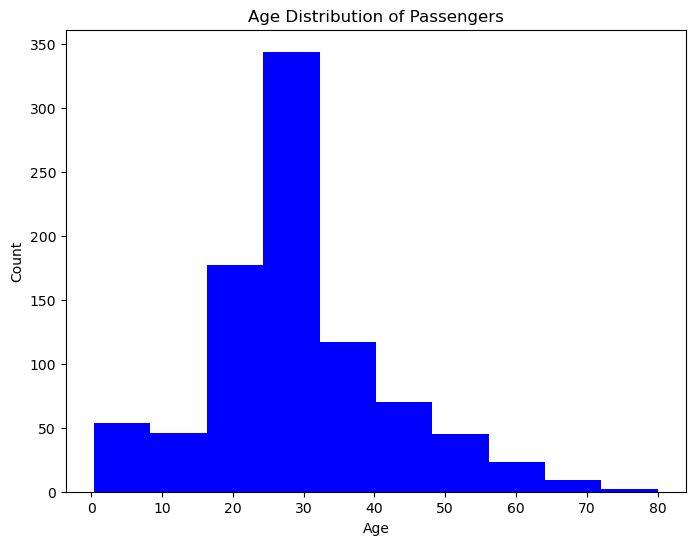

In [9]:
age = df['age']

# Ploting the histogram to show age distribution of passengers

plt.figure(figsize=(8, 6))
plt.hist(age, bins=10, color='blue')

# Customizing the plot
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')

#Show the plot
plt.show()

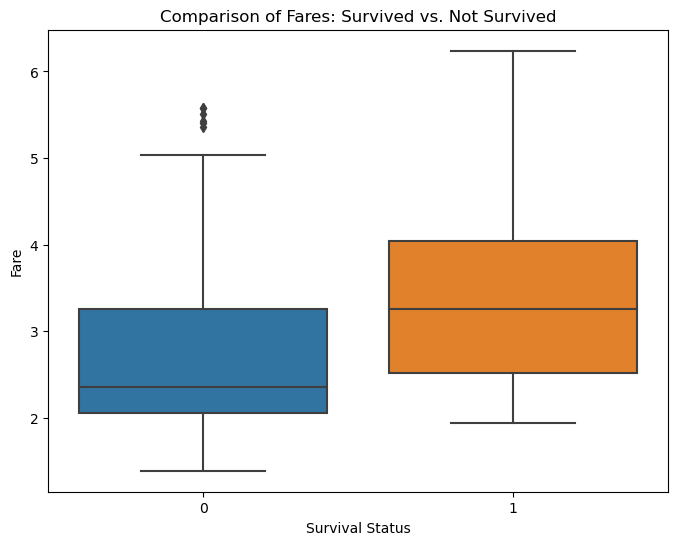

In [10]:
#Using a box plot to compare the fares paid by passengers
plt.figure(figsize=(8, 6))
sns.boxplot(x='survived', y='fare', data=df)

# Plot customization
plt.title('Comparison of Fares: Survived vs. Not Survived')
plt.xlabel('Survival Status')
plt.ylabel('Fare')

#Show plot
plt.show()

C:\Users\demon\AppData\Local\Temp\ipykernel_6328\1462601606.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


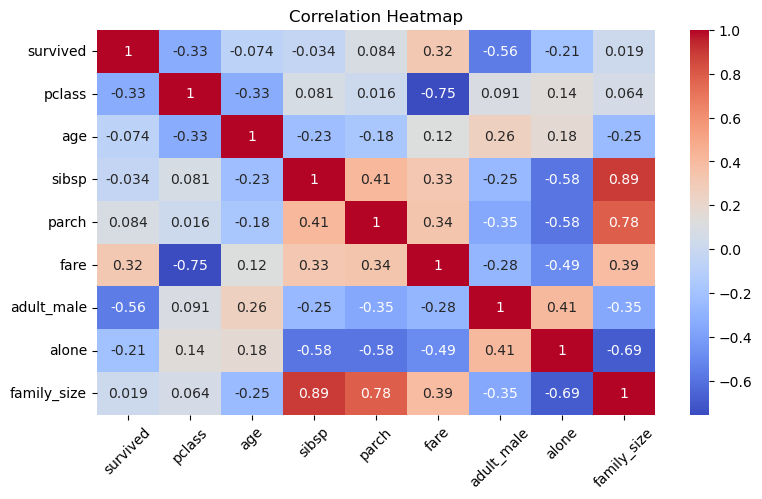

In [11]:
# Computing for correlation matrix
correlation_matrix = df.corr()

# heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Customize plot
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show plot
plt.show()


In [12]:
# # display option to show all columns
# pd.set_option('display.max_columns', None)

# # display option to show all rows
# pd.set_option('display.max_rows', None)

# Viewing the first few rows of the dataset
print(df.head(10))

# Getting information about the dataset
print(df.info())

# Statistical summary of the dataset
print(df.describe())

   survived  pclass     sex        age  sibsp  parch      fare embarked  \
0         0       3    male  22.000000      1      0  1.981001        S   
1         1       1  female  38.000000      1      0  4.266662        C   
2         1       3  female  26.000000      0      0  2.070022        S   
3         1       1  female  35.000000      1      0  3.972177        S   
4         0       3    male  35.000000      0      0  2.085672        S   
5         0       3    male  29.642093      0      0  2.135148        Q   
6         0       1    male  54.000000      0      0  3.948596        S   
7         0       3    male   2.000000      3      1  3.048088        S   
8         1       3  female  27.000000      0      2  2.409941        S   
9         1       2  female  14.000000      1      0  3.403555        C   

    class    who  adult_male deck  embark_town alive  alone  family_size  
0   Third    man        True    C  Southampton    no  False            1  
1   First  woman       F